In [1]:
#pip install librosa
#pip install openpyxl

In [1]:
import os
import numpy as np
import pandas as pd
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Part 1: Data Loading

In [14]:
# Path to data folders
wav_path = 'data/wav1' 
csv_path = 'data/labels'

# Initialize a dictionary to store data
data_dict = {}

# Loop through all files in the WAV folder
for file_name in os.listdir(wav_path):
    if file_name.endswith('.wav'):
        base_name = os.path.splitext(file_name)[0]
        
        # Form corresponding CSV file name
        csv_file_name = f'Label_{base_name.split("_")[-1]}.csv'
        csv_file_path = os.path.join(csv_path, csv_file_name)
        
        if os.path.exists(csv_file_path):
            # Load sleep start times and snoring data from the corresponding CSV file
            data = pd.read_csv(csv_file_path, delimiter=',', header=None, names=['start_time', 'end_time', 'label'])
            
            # Separate sleep start time and snoring data
           
            snoring_data = data.iloc[1:]  # Exclude the sleep start time
            
            # Initialize a list to store rows of snoring and non-snoring data
            data_rows = []
            
            #append the first normal moment: sleeping start time till first snore start time
            sleep_start=data.iloc[0]['start_time']
            first_snore=snoring_data.iloc[0]['start_time']
            first_row={'start_time': sleep_start, 'end_time': first_snore, 'label': 'N'}
            data_rows.append(first_row)
            
            for i in range(len(snoring_data)):
                row = snoring_data.iloc[i]
                start_time = row['start_time']
                end_time = row['end_time']
                label = row['label']
                
                # Convert the Pandas Series to a dictionary
                row_dict = {'start_time': start_time, 'end_time': end_time, 'label': label}
                # Append the current snoring row
                data_rows.append(row_dict)
                
                if i < len(snoring_data) - 1:
                    next_row = snoring_data.iloc[i + 1]
                    next_start_time = next_row['start_time']
                    
                    # Append the non-snoring row
                    if next_start_time > end_time:
                        non_snoring_row = {'start_time': end_time, 'end_time': next_start_time, 'label': 'N'}
                        data_rows.append(non_snoring_row)
            
            # Create a new DataFrame with combined snoring and non-snoring data
            combined_data = pd.DataFrame(data_rows, columns=['start_time', 'end_time', 'label'])

            # Append the combined data to the dictionary
            data_dict[file_name] = combined_data

# Data dictionary now contains WAV file names as keys and corresponding data as values


In [5]:
len(data_dict)

27

In [116]:
#store the dict_data content in csv file for each wav file
csv_output_path = 'data/wav1'  # Folder to store CSV files

# Create the output folder if it doesn't exist
if not os.path.exists(csv_output_path):
    os.makedirs(csv_output_path)

# Loop through all WAV files in data_dict
for wav_file, segment_data in data_dict.items():
    # Create a DataFrame from the segment_data
    segment_data_df = pd.DataFrame(segment_data)
    
    # Create a CSV file for each WAV file
    
    # Create a CSV file name in the desired format (e.g., "label_030.csv")
    file_number = wav_file.split('_')[-1].split('.')[0]
    
    output_file_path = os.path.join(csv_output_path, f'label_{file_number}.csv')
    segment_data_df.to_csv(output_file_path, index=False)

In [6]:
list(data_dict.items())[0]

('Video_00_041.wav',
       start_time     end_time label
 0     599.974612   673.847462     N
 1     673.847462   676.856363    S1
 2     676.856363   845.041367     N
 3     845.041367   848.050268    S1
 4     848.050268   861.297789     N
 ..           ...          ...   ...
 811  4415.081000  4418.089901    S1
 812  4418.089901  4427.994199     N
 813  4427.994199  4430.982204    S1
 814  4430.982204  4446.110287     N
 815  4446.110287  4449.119188    S1
 
 [816 rows x 3 columns])

## Part 2: Resample the wav files

In [6]:
#pip install scipy

In [15]:
import os
import librosa
import soundfile as sf

resampled_wav_path = 'data/resampled_wav'  # New folder for resampled WAV files

# Create the 'resampled_wav' folder if it doesn't exist
if not os.path.exists(resampled_wav_path):
    os.makedirs(resampled_wav_path)

# New sample rate for resampling
new_sr = 16000  # Adjust to your desired sample rate

# Initialize a new dictionary to store resampled data
resampled_data_dict = {}

# Loop through the original data dictionary
for wav_file, data in data_dict.items():
    # Load the original audio file using librosa
    wav_file_path = os.path.join(wav_path, wav_file)
    original_x, original_sr = librosa.load(wav_file_path, sr=None)
    
    # Resample the audio data using librosa
    resampled_audio = librosa.resample(original_x, original_sr, new_sr)
    # Save the resampled audio to a new WAV file
    resampled_wav_file_path = os.path.join(resampled_wav_path, wav_file)
    sf.write(resampled_wav_file_path, resampled_audio, new_sr)

TypeError: resample() takes 1 positional argument but 3 were given

In [8]:
original_sr

8000

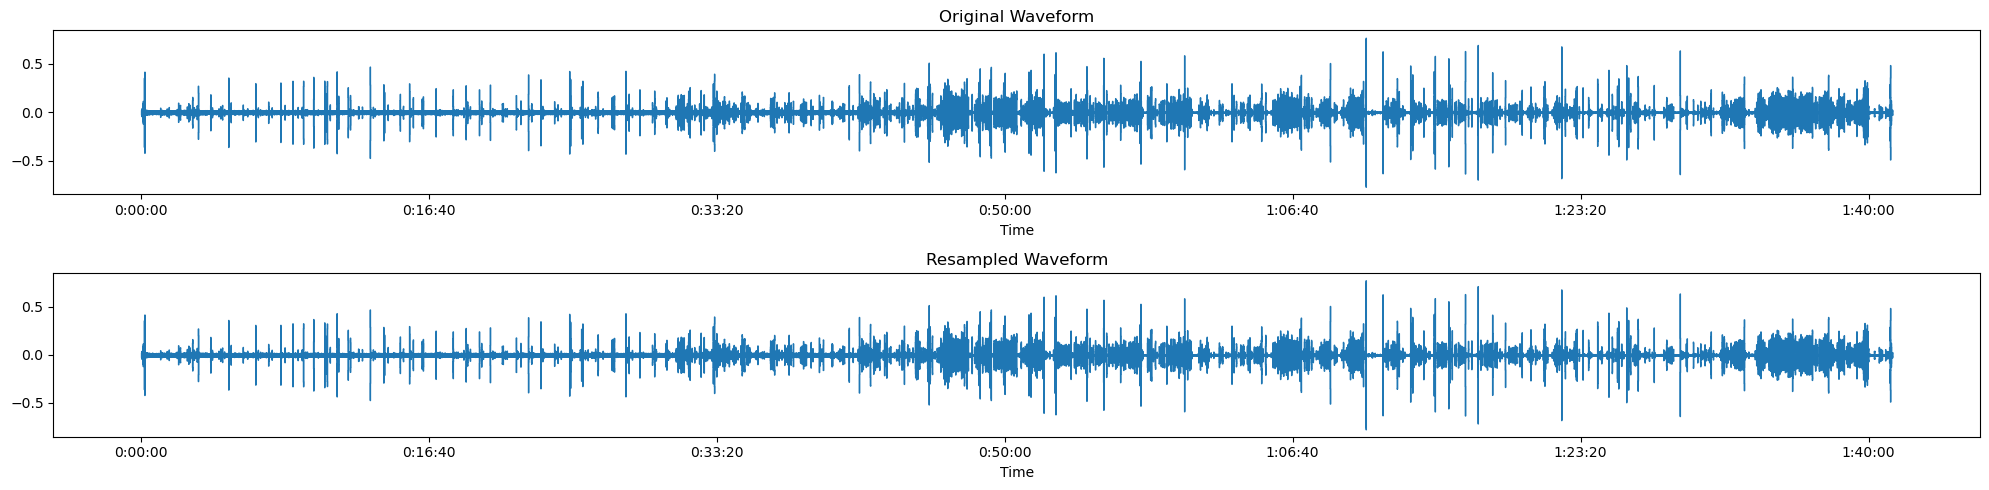

In [7]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the original and resampled audio files
original_x, original_sr = librosa.load('data/wav1/Video_00_050.wav', sr=None)
resampled_x, resampled_sr = librosa.load('data/resampled_wav/Video_00_050.wav', sr=None)

# Plot the waveform of the original and resampled audio
plt.figure(figsize=(20, 5))
plt.subplot(2, 1, 1)
librosa.display.waveshow(original_x, sr=original_sr)
plt.title('Original Waveform')
plt.subplot(2, 1, 2)
librosa.display.waveshow(resampled_x, sr=resampled_sr)
plt.title('Resampled Waveform')
plt.tight_layout()
plt.show()

In [10]:
original_sr

8000

In [11]:
resampled_sr

16000

In [12]:
resampled_x

array([-3.0517578e-05,  0.0000000e+00,  0.0000000e+00, ...,
        3.5400391e-03,  3.0517578e-03,  1.5869141e-03], dtype=float32)

In [13]:
original_x

array([0.        , 0.        , 0.        , ..., 0.00216675, 0.00292969,
       0.00320435], dtype=float32)

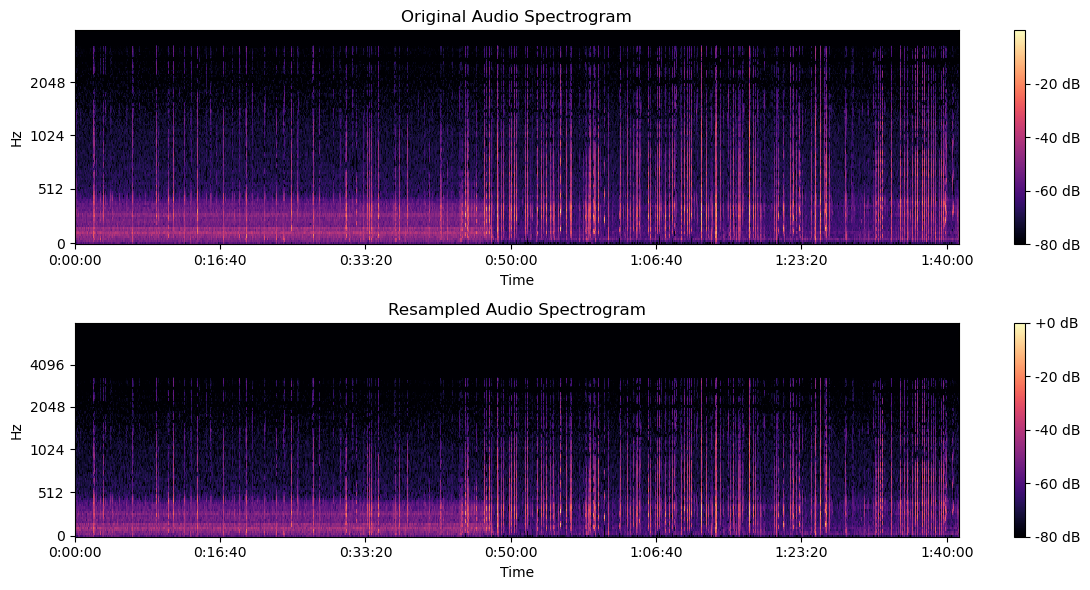

In [8]:
# Compute the spectrogram for the original audio
original_spectrogram = librosa.feature.melspectrogram(y=original_x, sr=original_sr)

# Compute the spectrogram for the resampled audio
resampled_spectrogram = librosa.feature.melspectrogram(y=resampled_x, sr=resampled_sr)

# Plot the spectrograms
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.power_to_db(original_spectrogram, ref=np.max),
                         y_axis='mel', x_axis='time', sr=original_sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Original Audio Spectrogram')

plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.power_to_db(resampled_spectrogram, ref=np.max),
                         y_axis='mel', x_axis='time', sr=resampled_sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Resampled Audio Spectrogram')

plt.tight_layout()
plt.show()

## Part 3: Data Augmentation

## Part 4: MFCC Extraction

In [18]:
# Path to data folders
wav_path = 'data/wav1' 
mfcc_features_folder = 'data/mfcc_features_csv'  # Change this to the folder where you want to save CSV files

window_size = 0.05  # 100 milliseconds
overlap = 0.5  # 50% overlap
# Initialize a list to store all rows of MFCCs and label information
all_mfcc_data = []

if not os.path.exists(mfcc_features_folder):
    os.makedirs(mfcc_features_folder)

# Loop through all files in the WAV folder
for wav_file, segment_data in data_dict.items():
    print(f"Extracting MFCC for {wav_file}")
    current_mfcc_data = []
    
    segment_count=0
    for i in range(len(segment_data)):
        row = segment_data.iloc[i]
        start_time = row['start_time']
        end_time = row['end_time']
        label = row['label']
        
        # Load the audio segment
        wav_file_path = os.path.join(wav_path, wav_file)
        audio_data, sr = librosa.load(wav_file_path, sr=None, offset=start_time, duration=end_time - start_time) 
        segment_count+=1
        print(f"segment no {segment_count} of length duration {end_time-start_time} seconds with label {label}")
        
        n_fft = int(window_size * sr)  # Set n_fft based on window size
        if n_fft>len(audio_data):
            n_fft=len(audio_data)
        
        hop_length = int(n_fft * (1 - overlap))  # Calculate hop length based on overlap
        # Compute MFCCs for the windowed audio
        mfccs = librosa.feature.mfcc(y=audio_data,
                                     sr=sr,
                                     n_mfcc=13,  # Number of MFCC coefficients
                                     n_fft=n_fft,
                                     hop_length=hop_length
                                    )
        # Append the MFCCs along with label and time information
        mfcc_row = {
            'mfcc': mfccs.tolist(),
            'label': label,
            'start_time': start_time,
            'end_time': end_time
        }
        all_mfcc_data.append(mfcc_row)
        current_mfcc_data.append(mfcc_row)
        
    # Create a new DataFrame with MFCCs and label information
    
    current_mfcc = pd.DataFrame(current_mfcc_data, columns=['mfcc', 'label', 'start_time', 'end_time'])
    file_number = wav_file.split('_')[-1].split('.')[0]
    output_file_path = os.path.join(mfcc_features_folder, f'{file_number}_mfcc.xlsx')
    current_mfcc.to_excel(output_file_path, index=False)

all_mfcc= pd.DataFrame(all_mfcc_data, columns=['mfcc', 'label', 'start_time', 'end_time'])
all_output_file_path = os.path.join(mfcc_features_folder, f'all_mfcc.xlsx')
all_mfcc.to_excel(all_output_file_path, index=False)


Extracting MFCC for Video_00_041.wav
segment no 1 of length duration 73.87284999999997 seconds with label N
segment no 2 of length duration 3.008901000000037 seconds with label S1
segment no 3 of length duration 168.18500400000005 seconds with label N
segment no 4 of length duration 3.0089009999999234 seconds with label S1
segment no 5 of length duration 13.247521000000006 seconds with label N
segment no 6 of length duration 3.0089000000000397 seconds with label S1
segment no 7 of length duration 166.3671280000001 seconds with label N
segment no 8 of length duration 3.0088999999998123 seconds with label S1
segment no 9 of length duration 27.330847000000176 seconds with label N
segment no 10 of length duration 3.0089009999999234 seconds with label S1
segment no 11 of length duration 1.0865469999998822 seconds with label N
segment no 12 of length duration 3.008901000000151 seconds with label S1
segment no 13 of length duration 4.095448000000033 seconds with label N
segment no 14 of lengt

/Users/ddcbhutan/miniconda3/lib/python3.10/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


segment no 103 of length duration 2.98800499999993 seconds with label S1
segment no 104 of length duration 0.5850640000001022 seconds with label N
segment no 105 of length duration 3.0089009999999234 seconds with label S1
segment no 106 of length duration 0.456822000000102 seconds with label N
segment no 107 of length duration 3.0858959999998206 seconds with label S1
segment no 108 of length duration 1.9318090000001575 seconds with label N
segment no 109 of length duration 2.9880060000000412 seconds with label S1
segment no 110 of length duration 4.492455999999947 seconds with label N
segment no 111 of length duration 3.0089000000000397 seconds with label S1
segment no 112 of length duration 0.8358059999998204 seconds with label N
segment no 113 of length duration 2.9880050000001575 seconds with label S1
segment no 114 of length duration 1.2746039999999539 seconds with label N
segment no 115 of length duration 2.98800499999993 seconds with label S1
segment no 116 of length duration 1.2

segment no 228 of length duration 0.8984910000001491 seconds with label N
segment no 229 of length duration 2.98800499999993 seconds with label S1
segment no 230 of length duration 0.8358060000000478 seconds with label N
segment no 231 of length duration 3.0089000000000397 seconds with label S1
segment no 232 of length duration 1.1074429999998756 seconds with label N
segment no 233 of length duration 2.98800499999993 seconds with label S1
segment no 234 of length duration 1.7760880000000725 seconds with label N
segment no 235 of length duration 3.0089000000000397 seconds with label S1
segment no 236 of length duration 1.0865479999999934 seconds with label N
segment no 237 of length duration 3.0089000000000397 seconds with label S1
segment no 238 of length duration 5.871534999999994 seconds with label N
segment no 239 of length duration 2.9880060000000412 seconds with label S1
segment no 240 of length duration 5.056623999999829 seconds with label N
segment no 241 of length duration 3.00

segment no 342 of length duration 3.0088999999998123 seconds with label S1
segment no 343 of length duration 0.77312000000029 seconds with label N
segment no 344 of length duration 2.9880060000000412 seconds with label S1
segment no 345 of length duration 1.2537079999997331 seconds with label N
segment no 346 of length duration 3.008901000000151 seconds with label S1
segment no 347 of length duration 1.4835549999997966 seconds with label N
segment no 348 of length duration 3.008901000000151 seconds with label S1
segment no 349 of length duration 0.7940149999999448 seconds with label N
segment no 350 of length duration 2.9880060000000412 seconds with label S1
segment no 351 of length duration 2.1730939999997645 seconds with label N
segment no 352 of length duration 2.9880060000000412 seconds with label S1
segment no 353 of length duration 0.4179030000000239 seconds with label N
segment no 354 of length duration 2.9880050000001575 seconds with label S1
segment no 355 of length duration 1

segment no 463 of length duration 0.3552180000001499 seconds with label N
segment no 464 of length duration 2.9880050000001575 seconds with label S1
segment no 465 of length duration 4.868567999999868 seconds with label N
segment no 466 of length duration 3.008901000000151 seconds with label S1
segment no 467 of length duration 1.3372890000000552 seconds with label N
segment no 468 of length duration 3.0297959999998056 seconds with label S1
segment no 469 of length duration 1.253708000000188 seconds with label N
segment no 470 of length duration 3.0088999999998123 seconds with label S1
segment no 471 of length duration 5.8559150000000955 seconds with label N
segment no 472 of length duration 3.27705799999967 seconds with label S1
segment no 473 of length duration 0.24894700000004377 seconds with label N
segment no 474 of length duration 3.008901000000151 seconds with label S1
segment no 475 of length duration 0.9611759999997957 seconds with label N
segment no 476 of length duration 2.9

segment no 628 of length duration 2.9880050000001575 seconds with label S1
segment no 629 of length duration 0.9820719999997891 seconds with label N
segment no 630 of length duration 2.967110000000048 seconds with label S1
segment no 631 of length duration 0.8358060000000478 seconds with label N
segment no 632 of length duration 2.9880049999997027 seconds with label S1
segment no 633 of length duration 5.328261999999995 seconds with label N
segment no 634 of length duration 3.008900000000267 seconds with label S1
segment no 635 of length duration 1.0656519999997727 seconds with label N
segment no 636 of length duration 3.008901000000151 seconds with label S1
segment no 637 of length duration 0.6895399999998517 seconds with label N
segment no 638 of length duration 2.9880050000001575 seconds with label S1
segment no 639 of length duration 9.674450999999863 seconds with label N
segment no 640 of length duration 3.008900000000267 seconds with label S1
segment no 641 of length duration 4.9

segment no 772 of length duration 3.008901000000151 seconds with label S1
segment no 773 of length duration 1.1283379999999852 seconds with label N
segment no 774 of length duration 3.0088999999998123 seconds with label S1
segment no 775 of length duration 204.6679250000002 seconds with label N
segment no 776 of length duration 3.0088999999998123 seconds with label S1
segment no 777 of length duration 51.54831800000011 seconds with label N
segment no 778 of length duration 2.9880050000001575 seconds with label S1
segment no 779 of length duration 0.9402810000001409 seconds with label N
segment no 780 of length duration 3.008901000000151 seconds with label S1
segment no 781 of length duration 1.1074429999998756 seconds with label N
segment no 782 of length duration 3.0088999999998123 seconds with label S1
segment no 783 of length duration 0.6477500000000873 seconds with label N
segment no 784 of length duration 3.008901000000151 seconds with label S1
segment no 785 of length duration 1.

In [22]:
len(all_mfcc_data)

816

In [109]:
first_segment=combined_mfcc_data.iloc[0]
first_segment

mfcc          [[-684.6166381835938, -665.8037109375, -665.89...
label                                                         N
start_time                                           360.009025
end_time                                            1004.479277
Name: 0, dtype: object

In [110]:
len(first_segment['mfcc'])

13

In [111]:
len(first_segment['mfcc'][1])

25779

In [112]:
len(first_segment['mfcc'][1])

25779

## Part 5: Extracting Mel_Spectrogram

In [19]:
# Path to data folders
wav_path = 'data/resampled_wav' 
mel_features_folder = 'data/mel_features_csv'  # Change this to the folder where you want to save CSV files

window_size = 0.05  # 100 milliseconds
overlap = 0.5  # 50% overlap
# Initialize a list to store all rows of MFCCs and label information
all_mel_data = []

if not os.path.exists(mel_features_folder):
    os.makedirs(mel_features_folder)

# Loop through all files in the WAV folder
for wav_file, segment_data in data_dict.items():
    print(f"Extracting mel_spectrogram for {wav_file}")
    current_mel_data = []
    segment_count=0
    for i in range(len(segment_data)):
        row = segment_data.iloc[i]
        start_time = row['start_time']
        end_time = row['end_time']
        label = row['label']
        
        # Load the audio segment
        wav_file_path = os.path.join(wav_path, wav_file)
        audio_data, sr = librosa.load(wav_file_path, sr=None, offset=start_time, duration=end_time - start_time) 
        
        segment_count+=1
        print(f"segment no {segment_count} of length duration {start_time-end_time} with label {label}")
        
        n_fft = int(window_size * sr)  # Set n_fft based on window size
        if n_fft>len(audio_data):
            n_fft=len(audio_data)
        
        hop_length = int(n_fft * (1 - overlap))  # Calculate hop length based on overlap
        # Compute mel_feature for the windowed audio
        mel_spectrogram = librosa.feature.melspectrogram(y=audio_data,
                                                         sr=sr,
                                                         n_fft=n_fft,
                                                         hop_length=hop_length
                                                         )
        
        mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
        # Append the MFCCs along with label and time information
        mel_row = {
            'mel_spectrogram': mel_spectrogram.tolist(),
            'label': label,
            'start_time': start_time,
            'end_time': end_time
        }
        all_mel_data.append(mel_row)
        current_mel_data.append(mel_row)
        
    # Create a new DataFrame with mel_spectrum and label information
    
    current_mel = pd.DataFrame(current_mel_data, columns=['mel_spectrogram', 'label', 'start_time', 'end_time'])
    file_number = wav_file.split('_')[-1].split('.')[0]
    output_file_path = os.path.join(mel_features_folder, f'{file_number}_mel.xlsx')
    current_mel.to_excel(output_file_path, index=False)

all_mel= pd.DataFrame(all_mel_data, columns=['mel_spectrogram', 'label', 'start_time', 'end_time'])
all_output_file_path = os.path.join(mel_features_folder, f'all_mel.xlsx')
all_mel.to_excel(all_output_file_path, index=False)

Extracting mel_spectrogram for Video_00_041.wav
segment no 1 of length duration -73.87284999999997 with label N
segment no 2 of length duration -3.008901000000037 with label S1
segment no 3 of length duration -168.18500400000005 with label N
segment no 4 of length duration -3.0089009999999234 with label S1
segment no 5 of length duration -13.247521000000006 with label N
segment no 6 of length duration -3.0089000000000397 with label S1
segment no 7 of length duration -166.3671280000001 with label N
segment no 8 of length duration -3.0088999999998123 with label S1
segment no 9 of length duration -27.330847000000176 with label N
segment no 10 of length duration -3.0089009999999234 with label S1
segment no 11 of length duration -1.0865469999998822 with label N
segment no 12 of length duration -3.008901000000151 with label S1
segment no 13 of length duration -4.095448000000033 with label N
segment no 14 of length duration -3.0088999999998123 with label S1
segment no 15 of length duration -4

/Users/ddcbhutan/miniconda3/lib/python3.10/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


segment no 80 of length duration -9.695345999999972 with label N
segment no 81 of length duration -3.0089000000000397 with label S1
segment no 82 of length duration -0.26672099999996135 with label N
segment no 83 of length duration -3.0585869999999886 with label S1
segment no 84 of length duration -1.6059460000001309 with label N
segment no 85 of length duration -3.0089000000000397 with label S1
segment no 86 of length duration -1.0865479999999934 with label N
segment no 87 of length duration -3.0089000000000397 with label S1
segment no 88 of length duration -0.21968799999990551 with label N
segment no 89 of length duration -3.0585869999999886 with label S1
segment no 90 of length duration -2.112671999999975 with label N
segment no 91 of length duration -2.9880060000000412 with label S1
segment no 92 of length duration -0.6059589999999844 with label N
segment no 93 of length duration -3.0089009999999234 with label S1
segment no 94 of length duration -1.5044500000001335 with label N
seg

segment no 238 of length duration -5.871534999999994 with label N
segment no 239 of length duration -2.9880060000000412 with label S1
segment no 240 of length duration -5.056623999999829 with label N
segment no 241 of length duration -3.008901000000151 with label S1
segment no 242 of length duration -0.32773699999984274 with label N
segment no 243 of length duration -3.113203999999996 with label S1
segment no 244 of length duration -1.7410540000000765 with label N
segment no 245 of length duration -3.010680000000093 with label S1
segment no 246 of length duration -0.16385300000001735 with label N
segment no 247 of length duration -3.0858959999998206 with label S1
segment no 248 of length duration -10.016888000000108 with label N
segment no 249 of length duration -3.0089000000000397 with label S1
segment no 250 of length duration -0.0005149999999503052 with label N
segment no 251 of length duration -2.621646000000055 with label S1
segment no 252 of length duration -2.3299879999999575 wi

segment no 394 of length duration -3.008900999999696 with label S1
segment no 395 of length duration -1.3163940000004004 with label N
segment no 396 of length duration -3.008900999999696 with label S1
segment no 397 of length duration -5.098414000000048 with label N
segment no 398 of length duration -3.008901000000151 with label S1
segment no 399 of length duration -4.722301999999672 with label N
segment no 400 of length duration -2.9880060000000412 with label S1
segment no 401 of length duration -1.0447570000001178 with label N
segment no 402 of length duration -3.008901000000151 with label S1
segment no 403 of length duration -0.9402809999996862 with label N
segment no 404 of length duration -3.008900000000267 with label S1
segment no 405 of length duration -0.8567010000001574 with label N
segment no 406 of length duration -2.9880059999995865 with label S1
segment no 407 of length duration -1.4626600000001417 with label N
segment no 408 of length duration -2.9880050000001575 with lab

segment no 547 of length duration -1.3581840000001648 with label N
segment no 548 of length duration -2.9880060000000412 with label S1
segment no 549 of length duration -1.1283370000001014 with label N
segment no 550 of length duration -3.008900999999696 with label S1
segment no 551 of length duration -1.2954990000002908 with label N
segment no 552 of length duration -2.9880049999997027 with label S1
segment no 553 of length duration -46.09468500000003 with label N
segment no 554 of length duration -2.9880060000000412 with label S1
segment no 555 of length duration -12.913198000000193 with label N
segment no 556 of length duration -3.008900999999696 with label S1
segment no 557 of length duration -0.9611760000002505 with label N
segment no 558 of length duration -2.9880060000000412 with label S1
segment no 559 of length duration -6.414807999999994 with label N
segment no 560 of length duration -2.9880060000000412 with label S1
segment no 561 of length duration -15.504195999999865 with 

segment no 689 of length duration -1.253708999999617 with label N
segment no 690 of length duration -3.008900000000267 with label S1
segment no 691 of length duration -4.095448000000033 with label N
segment no 692 of length duration -2.9880060000000412 with label S1
segment no 693 of length duration -4.262608999999884 with label N
segment no 694 of length duration -3.0088999999998123 with label S1
segment no 695 of length duration -1.3790800000001582 with label N
segment no 696 of length duration -3.0088999999998123 with label S1
segment no 697 of length duration -0.8984910000003765 with label N
segment no 698 of length duration -2.9880060000000412 with label S1
segment no 699 of length duration -12.829617999999755 with label N
segment no 700 of length duration -3.008900000000267 with label S1
segment no 701 of length duration -4.701406999999563 with label N
segment no 702 of length duration -2.9880060000000412 with label S1
segment no 703 of length duration -0.7290980000002492 with la

segment no 813 of length duration -9.904297999999471 with label N
segment no 814 of length duration -2.9880050000001575 with label S1
segment no 815 of length duration -15.128083000000515 with label N
segment no 816 of length duration -3.0089009999992413 with label S1


In [21]:
len(all_mel)

816

In [103]:
first_segment=combined_mel_feature_data.iloc[0]

In [104]:
len(first_segment['mel_spectrogram'])

128

In [105]:
len(first_segment['mel_spectrogram'][0])

686